In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2.extras

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection
con = PostgresConnection().getConnection()

Successfully connected to the database


In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, tim.month,  SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY CUBE(s.division, tim.month) " 
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Division','Month', 'Sales'])
df = df.dropna()
df

Successfully connected to the database


,Division,Month,Sales
1,DHAKA,11.0,3343397.00
2,SYLHET,1.0,485369.75
3,CHITTAGONG,8.0,1667686.75
4,CHITTAGONG,11.0,1640113.75
5,RAJSHAHI,3.0,1002924.25
...,...,...,...
80,RAJSHAHI,10.0,1034440.50
81,BARISAL,2.0,582863.00
82,SYLHET,5.0,479031.75
83,CHITTAGONG,9.0,1627565.25


In [4]:
df = df.iloc[:, :].values

In [5]:
from sklearn.preprocessing import LabelEncoder
division=LabelEncoder()
df[:,0]=division.fit_transform(df[:,0])

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')
y=ct.fit_transform(df)
y=pd.DataFrame(y)
y

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,3343397.00
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,485369.75
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1667686.75
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,1640113.75
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1002924.25
...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,1034440.50
80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,582863.00
81,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,479031.75
82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1627565.25


In [7]:
X = y.iloc[:, :8].values;
# X = X[:, 1:]
# X
Y = y.iloc[:, -1].values;

In [8]:
# Splittting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0);


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [11]:
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  1283177.406716418
Coefficients:


[(array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0], dtype=object),
  -232867.30601048132),
 (array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], dtype=object),
  129995.43985257126),
 (array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0], dtype=object),
  754247.159367619),
 (array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0], dtype=object),
  -110891.23313654008),
 (array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0], dtype=object),
  -99760.23968753149),
 (array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], dtype=object),
  -206061.18007717535),
 (array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0], dtype=object),
  -264507.3447847553),
 (array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0], dtype=object),
  8236.77821709705)]

In [16]:
y_pred = regressor.predict(X_test)
y_pred 

array([ 939038.37351546,  705036.88467937, 3404554.76935874,
        707329.00819483,  934454.12648454,  458421.44046908,
       1648119.69673401,  463005.6875    , 1016299.40504216,
       3395386.27529691,  474466.30507729, 1657288.19079584,
        622933.91502372,  950498.99109275,  625226.03853918,
        936746.25      ,  469882.05804638])

In [13]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 939038.37351546  705036.88467937 3404554.76935874  707329.00819483
  934454.12648454  458421.44046908 1648119.69673401  463005.6875
 1016299.40504216 3395386.27529691  474466.30507729 1657288.19079584
  622933.91502372  950498.99109275  625226.03853918  936746.25
  469882.05804638]


In [14]:
mlr_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
0,977201.75,9.390384e+05
1,719549.00,7.050369e+05
2,3483408.25,3.404555e+06
3,703469.00,7.073290e+05
4,966610.25,9.344541e+05


In [17]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(Y_test, y_pred)
meanSqErr = metrics.mean_squared_error(Y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))

print('R squared: {:.2f}'.format(regressor.score(X,Y)*100))
print('Mean Absolute Error: {:.2f}'.format(meanAbErr))
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 57.16
Mean Absolute Error: 23518.91
Mean Square Error: 1022089534.832504
Root Mean Square Error: 31970.135045578147


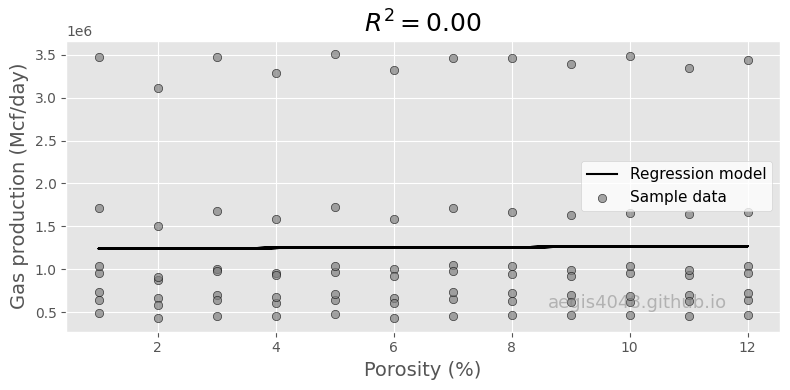

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

######################################## Data preparation #########################################

df = pd.DataFrame(list(records), columns = ['Division','Month', 'Sales'])
df = df.dropna()
df
X = df['Month'].values.reshape(-1,1)
y = df['Sales'].values

# ################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
response

# ############################################## Evaluate ############################################

r2 = model.score(X, y)
r2

# ############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
          transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# from mpl_toolkits.mplot3d import Axes3D

# ######################################## Data preparation #########################################


# X = df[['Por', 'Brittle']].values.reshape(-1,2)
# Y = df['Prod']

# ######################## Prepare model data point for visualization ###############################

# x = X[:, 0]
# y = X[:, 1]
# z = Y

# x_pred = np.linspace(6, 24, 30)   # range of porosity values
# y_pred = np.linspace(0, 100, 30)  # range of brittleness values
# xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
# model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# ################################################ Train #############################################

# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
# predicted = model.predict(model_viz)

# ############################################## Evaluate ############################################

# r2 = model.score(X, Y)

# ############################################## Plot ################################################

# plt.style.use('default')

# fig = plt.figure(figsize=(12, 4))

# ax1 = fig.add_subplot(131, projection='3d')
# ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

# axes = [ax1, ax2, ax3]

# for ax in axes:
#     ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
#     ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
#     ax.set_xlabel('Porosity (%)', fontsize=12)
#     ax.set_ylabel('Brittleness', fontsize=12)
#     ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
#     ax.locator_params(nbins=4, axis='x')
#     ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

# ax1.view_init(elev=28, azim=120)
# ax2.view_init(elev=4, azim=114)
# ax3.view_init(elev=60, azim=165)

# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

# fig.tight_layout()

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.month,  SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE  s.division = 'DHAKA'"\
"GROUP BY CUBE(tim.month) " \
" ORDER BY tim.month ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Month', 'Sales'])
df = df.dropna()
df

Successfully connected to the database


,Month,Sales
0,1.0,3476458.00
1,2.0,3107674.50
2,3.0,3468933.00
3,4.0,3289565.75
4,5.0,3511186.25
5,6.0,3322764.50
6,7.0,3456073.75
7,8.0,3466980.75
8,9.0,3397501.75
9,10.0,3483408.25


In [88]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.]])

In [89]:
from sklearn.linear_model import LinearRegression
lin_Reg = LinearRegression()
lin_Reg.fit(X,Y)

LinearRegression()

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03, 1.4641e+04],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03, 2.0736e+04]])

In [79]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

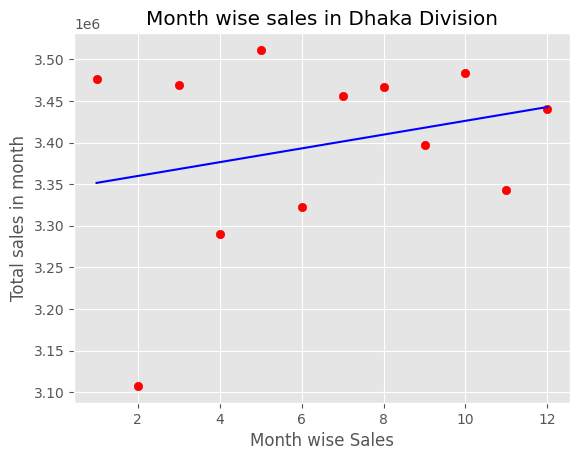

In [80]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_Reg.predict(X), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

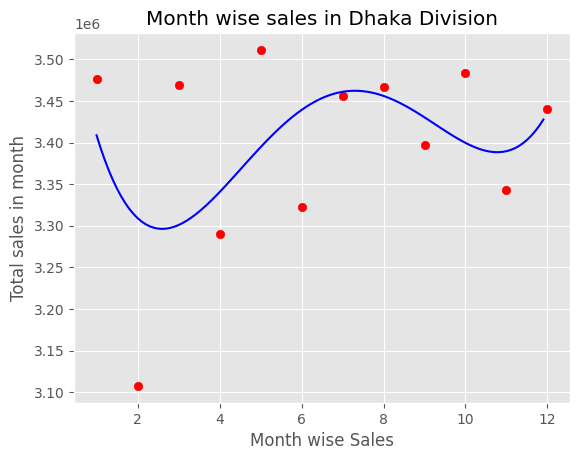

In [92]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color='red')
plt.plot(X_grid, lin_reg_2 .predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

In [99]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1:2].values
Y

array([[Decimal('3476458.00')],
       [Decimal('3107674.50')],
       [Decimal('3468933.00')],
       [Decimal('3289565.75')],
       [Decimal('3511186.25')],
       [Decimal('3322764.50')],
       [Decimal('3456073.75')],
       [Decimal('3466980.75')],
       [Decimal('3397501.75')],
       [Decimal('3483408.25')],
       [Decimal('3343397.00')],
       [Decimal('3440676.25')]], dtype=object)

In [101]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
X

array([[-1.59325501],
       [-1.30357228],
       [-1.01388955],
       [-0.72420682],
       [-0.43452409],
       [-0.14484136],
       [ 0.14484136],
       [ 0.43452409],
       [ 0.72420682],
       [ 1.01388955],
       [ 1.30357228],
       [ 1.59325501]])

In [102]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

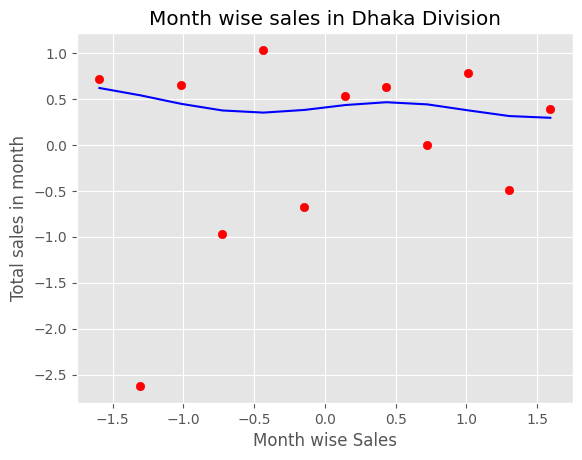

In [103]:
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

In [108]:
# y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[4.4]]))))
# y_pred

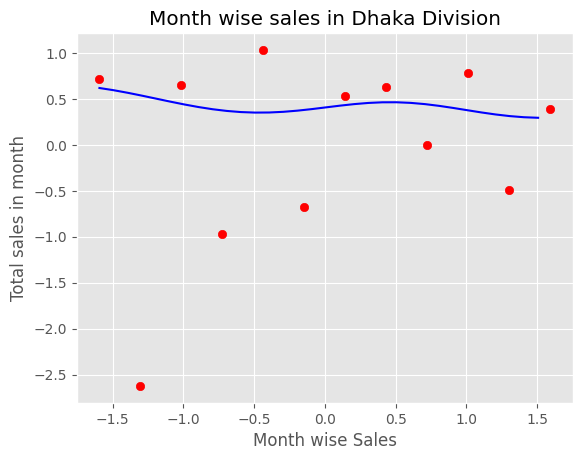

In [112]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

In [113]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1:2].values

In [114]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

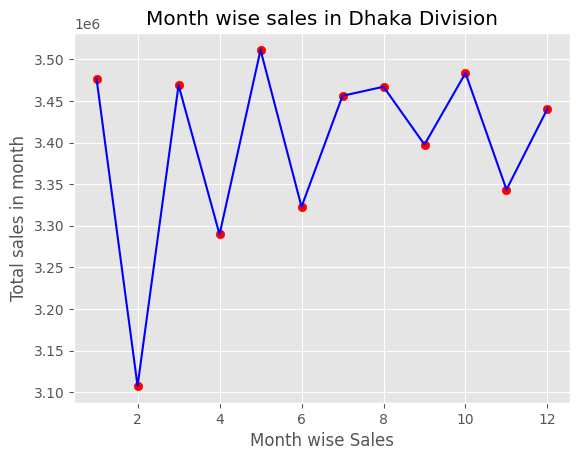

In [115]:
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

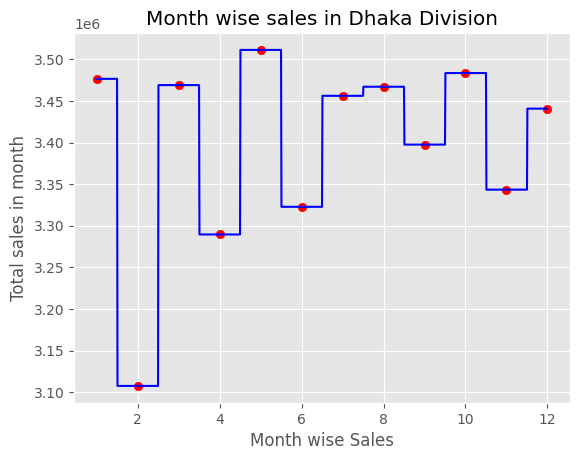

In [122]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

In [121]:
y_pred = regressor.predict([[2.5]])
y_pred

array([3107674.5])

In [131]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,Y)

C:\Users\Nayan\AppData\Local\Temp\ipykernel_6868\474828251.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,Y)


RandomForestRegressor(n_estimators=300, random_state=0)

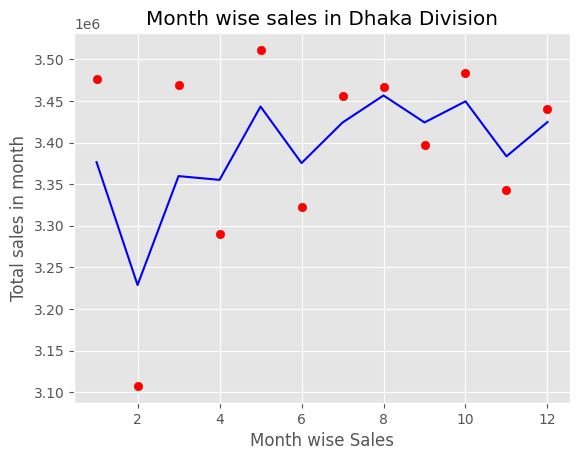

In [132]:
plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

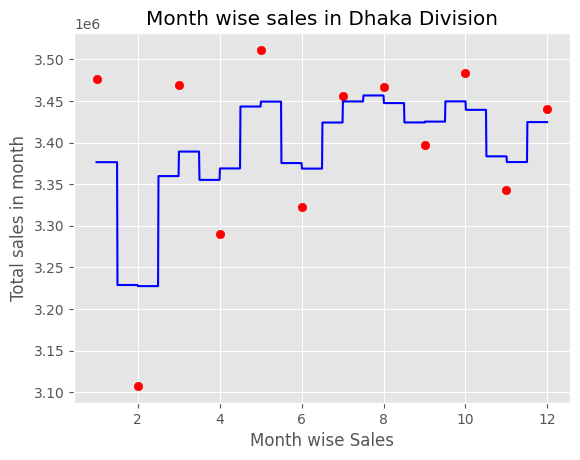

In [133]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Month wise sales in Dhaka Division')
plt.xlabel('Month wise Sales')
plt.ylabel('Total sales in month')
plt.show()

In [134]:
y_pred = regressor.predict([[2.5]])
y_pred

array([3227531.36166667])